In [28]:
import pandas as pd
df=pd.read_csv("diminos_data.csv")
print(df.columns)

Index(['order_id', 'order_placed_at', 'order_delivered_at'], dtype='object')


In [29]:
print(df.head())

   order_id      order_placed_at          order_delivered_at
0   1523111  2023-03-01 00:00:59  2023-03-01 00:18:07.443132
1   1523112  2023-03-01 00:03:59  2023-03-01 00:19:34.925241
2   1523113  2023-03-01 00:07:22  2023-03-01 00:22:28.291385
3   1523114  2023-03-01 00:07:47  2023-03-01 00:46:19.019399
4   1523115  2023-03-01 00:09:03  2023-03-01 00:25:13.619056


In [30]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
order_id              15000 non-null int64
order_placed_at       15000 non-null object
order_delivered_at    15000 non-null object
dtypes: int64(1), object(2)
memory usage: 351.6+ KB
None


In [31]:
df['order_placed_at']=pd.to_datetime(df['order_placed_at'])
df['order_delivered_at']=pd.to_datetime(df['order_delivered_at'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
order_id              15000 non-null int64
order_placed_at       15000 non-null datetime64[ns]
order_delivered_at    15000 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 351.6 KB
None


Calculating time taken for the delivery of the order

In [32]:
df['Time_taken']=df['order_delivered_at']-df['order_placed_at']

In [33]:
df.head()

,order_id,order_placed_at,order_delivered_at,Time_taken
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,00:17:08.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,00:15:35.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,00:15:06.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,00:38:32.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,00:16:10.619056


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
order_id              15000 non-null int64
order_placed_at       15000 non-null datetime64[ns]
order_delivered_at    15000 non-null datetime64[ns]
Time_taken            15000 non-null timedelta64[ns]
dtypes: datetime64[ns](2), int64(1), timedelta64[ns](1)
memory usage: 468.8 KB


In [35]:
df['order_placed_week']=df['order_placed_at'].dt.day_name()

In [36]:
df['order_placed_day']=df['order_placed_at'].dt.day

In [37]:
df.head()

,order_id,order_placed_at,order_delivered_at,Time_taken,order_placed_week,order_placed_day
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,00:17:08.443132,Wednesday,1
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,00:15:35.925241,Wednesday,1
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,00:15:06.291385,Wednesday,1
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,00:38:32.019399,Wednesday,1
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,00:16:10.619056,Wednesday,1


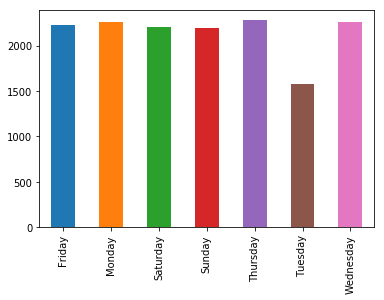

In [38]:
df['order_placed_week'].value_counts().sort_index().plot(kind='bar')

In [39]:
df['order_placed_week'].value_counts()

Thursday     2280
Wednesday    2259
Monday       2256
Friday       2223
Saturday     2209
Sunday       2191
Tuesday      1582
Name: order_placed_week, dtype: int64

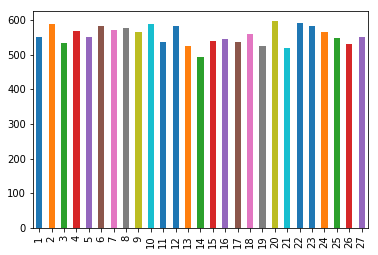

In [40]:
df['order_placed_day'].value_counts().sort_index().plot(kind='bar')

In [41]:
df_2=df[['order_placed_at']]
df_2.shape

(15000, 1)

In [42]:
df_2['order_placed_at_week']=df_2['order_placed_at'].dt.day_name()
df_2['order_placed_at_day']=df_2['order_placed_at'].dt.day
df_2.drop(columns=['order_placed_at'],inplace=True)
df_2.drop_duplicates(inplace=True)

/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/user/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

In [43]:
df_2.head()

,order_placed_at_week,order_placed_at_day
0,Wednesday,1
550,Thursday,2
1138,Friday,3
1672,Saturday,4
2239,Sunday,5


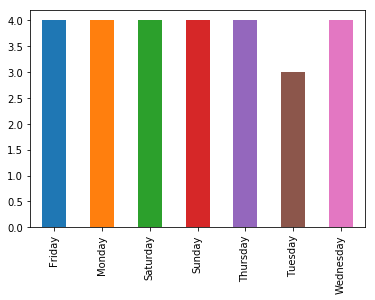

In [44]:
df_2['order_placed_at_week'].value_counts().sort_index().plot(kind='bar')

Observation: Only 3 Tuesday's are there in the dates given, so taking the average of orders taken for each week day

In [45]:
df.columns

Index(['order_id', 'order_placed_at', 'order_delivered_at', 'Time_taken',
       'order_placed_week', 'order_placed_day'],
      dtype='object')

In [46]:
df.groupby('order_placed_week').count()

,order_id,order_placed_at,order_delivered_at,Time_taken,order_placed_day
order_placed_week,,,,,
Friday,2223,2223,2223,2223,2223
Monday,2256,2256,2256,2256,2256
Saturday,2209,2209,2209,2209,2209
Sunday,2191,2191,2191,2191,2191
Thursday,2280,2280,2280,2280,2280
Tuesday,1582,1582,1582,1582,1582
Wednesday,2259,2259,2259,2259,2259


In [47]:
import numpy as np
df['Time_taken']=df['Time_taken']/np.timedelta64(1, 'm')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 6 columns):
order_id              15000 non-null int64
order_placed_at       15000 non-null datetime64[ns]
order_delivered_at    15000 non-null datetime64[ns]
Time_taken            15000 non-null float64
order_placed_week     15000 non-null object
order_placed_day      15000 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 703.2+ KB


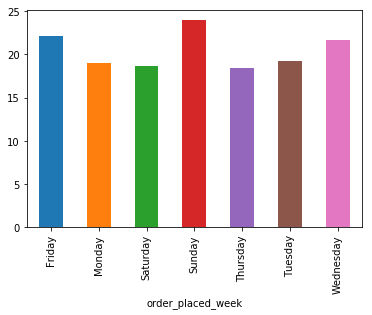

In [48]:
df.groupby('order_placed_week')['Time_taken'].mean().plot(kind='bar')

Average Time taken for Sunday is more compared to other days